ICI : T_id est le pas (temps)

Les actions sont : 'rating', 'food_rating' et 'service_rating'

Vous pouvez utiliser le format que vous préférez : 
- DataFrame de pandas (df_data) 
- un tableau numpy (np_data), alors vous allez faire : my_data = np_data
- un dictionnaire (in_data), vous allez faire : my_data = in_data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import operator

# DataFrame
df_data_initial = pd.read_csv("rating_final_user.csv")
df_data = df_data_initial.loc[:, ["T_ID", "rating", "food_rating", "service_rating"]]

# Dictionnaire
in_data = df_data_initial.to_dict()

# Tableau numpy
np_data = df_data_initial.loc[:, ["T_ID", "rating", "food_rating", "service_rating"]].to_numpy()

In [2]:
# 
df_data.head(5)

,T_ID,rating,food_rating,service_rating
0,1,1,1,2
1,2,1,1,1
2,3,1,1,1
3,4,1,1,1
4,5,1,1,1


In [3]:
print(np_data)

[[   1    1    1    2]
 [   2    1    1    1]
 [   3    1    1    1]
 ...
 [1159    2    2    2]
 [1160    2    2    1]
 [1161    1    2    1]]


In [4]:
print(in_data)

{'T_ID': {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 30: 31, 31: 32, 32: 33, 33: 34, 34: 35, 35: 36, 36: 37, 37: 38, 38: 39, 39: 40, 40: 41, 41: 42, 42: 43, 43: 44, 44: 45, 45: 46, 46: 47, 47: 48, 48: 49, 49: 50, 50: 51, 51: 52, 52: 53, 53: 54, 54: 55, 55: 56, 56: 57, 57: 58, 58: 59, 59: 60, 60: 61, 61: 62, 62: 63, 63: 64, 64: 65, 65: 66, 66: 67, 67: 68, 68: 69, 69: 70, 70: 71, 71: 72, 72: 73, 73: 74, 74: 75, 75: 76, 76: 77, 77: 78, 78: 79, 79: 80, 80: 81, 81: 82, 82: 83, 83: 84, 84: 85, 85: 86, 86: 87, 87: 88, 88: 89, 89: 90, 90: 91, 91: 92, 92: 93, 93: 94, 94: 95, 95: 96, 96: 97, 97: 98, 98: 99, 99: 100, 100: 101, 101: 102, 102: 103, 103: 104, 104: 105, 105: 106, 106: 107, 107: 108, 108: 109, 109: 110, 110: 111, 111: 112, 112: 113, 113: 114, 114: 115, 115: 116, 116: 117, 117: 118, 118: 119, 119: 120, 120: 121

<h3>Calculer la valeur de l'action Q avec initialisation à zéro. </h3>

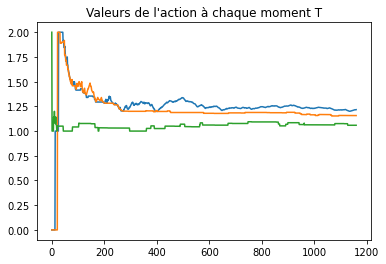

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

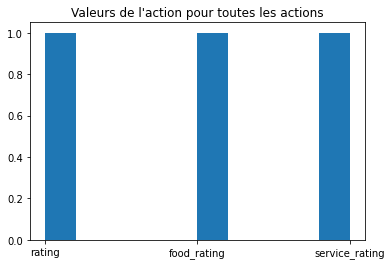

In [9]:
my_data = df_data.copy()

epsilon = 0.1
# essayer avec epsilon 0.01, 0.2 

# On stocke ici les valeurs de l'action pour l'affichage :
out_print = {"rating":[], "food_rating":[], "service_rating":[]}

out_reward = {"rating":[], "food_rating":[], "service_rating":[]}

# Qt = 1/ t - 1 somme t-1 de r

# Qt+1 = 1/t t somme sur i = 1 de ri (moment donné)

# Action  ->  change d'état -> récompense

# Qt+1 = Qt + 1/t(Rt - Qt)


# On stocke ici les Qta = valeurs estimes pour chaque action, à un moment T donné
Qta = {"rating":[], "food_rating":[], "service_rating":[]}

Q_value = {"rating":0, "food_rating":0, "service_rating":0}

# pour chaque pas :
for i in range(my_data.shape[0]):
    random_num = np.random.uniform(0,1)
    if random_num < epsilon: # exploration : on choisit une action aléatoire:
        # liste des actions : 
        actions_list = out_reward.keys()
        number_actions = len(actions_list)
        
        # on choisit au hasard un index des clés de out_reward :
        index = random.randint(0, number_actions-1)
        
        action = list(out_reward.keys())[index]
    else: # exploitation : on choisit la meilleure action pour l'état présent:
        action = ""
        max_action_value = 0
        
        for current_action in Q_value.keys(): 
            qa = Q_value[current_action]
            if qa >= max_action_value:
                max_action_value = qa
                action = current_action
    
    # pour l'action choisie :
    #on recupere la recompense correspondante dans le DataFrame
    reward = my_data.loc[i,action]

    # On calcule Qt(a) pour cette action, selon la règle de la mise à jour incrémentale
    N = len(Qta[action]) # nombre de fois que l'action a été prise
    
    if N == 0: 
        # cas particulier du premier élément :
        #la valeur de l'action est égale à la recompense courrante
        QTA = reward
    else:
        QTA_precedent = Qta[action][-1]
        QTA = QTA_precedent + (1/N) * (reward - QTA_precedent)
        
    # Ensuite on la met dans Qta:
    # pour l'action choisie, on l'ajoute dans Qta dans 
    Qta[action].append(QTA)
    
    # Et dans out_print, pour l'afficher graphiquement
    out_print[action].append(QTA)
        
    # On rajoute la recompense à la liste des recompenses correspondante dans out_reward :
    out_reward[action].append(reward)
    
    # On met à jour Q_value pour cette action:
    Q_value[action] = QTA
        
    # Pour les autres actions, 
    # on recopie la dernière valeur de l'action dans out_print, pour l'affichage
    for act in out_print.keys():
        if act == action:
            continue
        else:
            if len(out_print[act]) == 0: # cas particulier du premier élément
                out_print[act].append(0)
            else:    
                # on récupère la dernière valeur de l'action de l'action:
                last_action_value = out_print[act][-1]
                
                # On la rajoute à la liste, puisqu'elle ne changera pas à ce moment T:
                out_print[act].append(last_action_value) 
        
# On affiche la valeur de l'action pour chaque action, avec matplotlib

nombre_pas = df_data.shape[0] # nombre d'élements dans le DataFrame = nombre steps
x = range(df_data.shape[0])

# pour chaque clé k dans Q
plt.title("Valeurs de l'action à chaque moment T")
for action in out_print.keys():
    liste_valeurs_action_dans_le_temps =  out_print[action]
    plt.plot(x, liste_valeurs_action_dans_le_temps)
plt.show()    

plt.title("Valeurs de l'action pour toutes les actions")
plt.hist(Q_value)    



<h3>Calculer la valeur de l'action Q avec initialisation à 5. </h3>

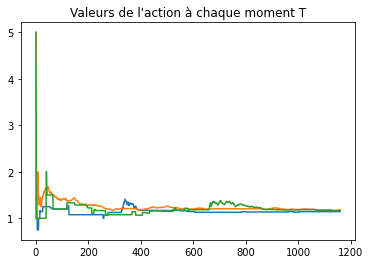

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

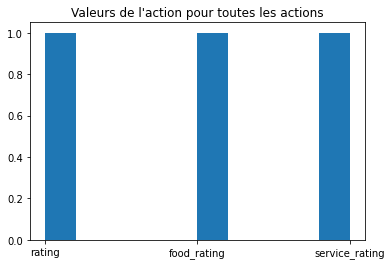

In [11]:
INITIALIZATION_VALUE = 5

my_data = df_data.copy()

epsilon = 0.1
# essayer avec epsilon 0.01, 0.2 

# On stocke ici les valeurs de l'action pour l'affichage :
out_print = {"rating":[], "food_rating":[], "service_rating":[]}

out_reward = {"rating":[], "food_rating":[], "service_rating":[]}

# On stocke ici les Qta = valeurs estimes pour chaque action, à un moment T donné
Qta = {"rating":[], "food_rating":[], "service_rating":[]}

Q_value = {"rating":INITIALIZATION_VALUE, "food_rating":INITIALIZATION_VALUE, "service_rating":INITIALIZATION_VALUE}

# pour chaque pas :
for i in range(my_data.shape[0]):
    random_num = np.random.uniform(0,1)
    if random_num < epsilon: # exploration : on choisit une action aléatoire:
        # liste des actions : 
        actions_list = out_reward.keys()
        number_actions = len(actions_list)
        
        # on choisit au hasard un index des clés de out_reward :
        index = random.randint(0, number_actions-1)
        
        action = list(out_reward.keys())[index]
    else: # exploitation : on choisit la meilleure action pour l'état présent:
        action = ""
        max_action_value = 0
        
        for current_action in Q_value.keys(): 
            qa = Q_value[current_action]
            if qa > max_action_value:
                max_action_value = qa
                action = current_action
    
    # pour l'action choisie :
    #on recupere la recompense correspondante dans le DataFrame
    reward = my_data.loc[i,action]

    # On calcule Qt(a) pour cette action, selon la règle de la mise à jour incrémentale
    N = len(Qta[action]) # nombre de fois que l'action a été prise
    
    if N == 0: 
        # cas particulier du premier élément :
        #la valeur de l'action est égale à la recompense courrante
        QTA = reward
    else:
        QTA_precedent = Qta[action][-1]
        QTA = QTA_precedent + (1/N) * (reward - QTA_precedent)
        
    # Ensuite on la met dans Qta:
    # pour l'action choisie, on l'ajoute dans Qta dans 
    Qta[action].append(QTA)
    
    # Et dans out_print, pour l'afficher graphiquement
    out_print[action].append(QTA)
        
    # On rajoute la recompense à la liste des recompenses correspondante dans out_reward :
    out_reward[action].append(reward)
    
    # On met à jour Q_value pour cette action:
    Q_value[action] = QTA
        
    # Pour les autres actions, 
    # on recopie la dernière valeur de l'action dans out_print, pour l'affichage
    for act in out_print.keys():
        if act == action:
            continue
        else:
            if len(out_print[act]) == 0: # cas particulier du premier élément
                out_print[act].append(INITIALIZATION_VALUE)
            else:    
                # on récupère la dernière valeur de l'action de l'action:
                last_action_value = out_print[act][-1]
                
                # On la rajoute à la liste, puisqu'elle ne changera pas à ce moment T:
                out_print[act].append(last_action_value) 
        
# On affiche la valeur de l'action pour chaque action, avec matplotlib

nombre_pas = df_data.shape[0] # nombre d'élements dans le DataFrame = nombre steps
x = range(df_data.shape[0])

# pour chaque clé k dans Q
plt.title("Valeurs de l'action à chaque moment T")
for action in out_print.keys():
    liste_valeurs_action_dans_le_temps =  out_print[action]
    plt.plot(x, liste_valeurs_action_dans_le_temps)
plt.show()    



plt.title("Valeurs de l'action pour toutes les actions")
plt.hist(Q_value)  
    